Week 1 Group Project

In [1]:
# We will need the RBCPath type from the rbclib package to load data from the RBC.
from rbclib import RBCPath

# We'll also want to load some data directly from the filesystem.
from pathlib import Path

# We'll want to load/process some of the data using pandas and numpy.
import pandas as pd
import numpy as np

In [5]:
# Participant meta-data is generally located in the BIDS repository for each
# study:
rbcdata_path = Path('/home/jovyan/shared/data/RBC')
train_filepath = rbcdata_path / 'train_participants.tsv'
test_filepath = rbcdata_path / 'test_participants.tsv'

# Load the PNC participants TSV files...
with train_filepath.open('r') as f:
    train_data = pd.read_csv(f, sep='\t')
with test_filepath.open('r') as f:
    test_data = pd.read_csv(f, sep='\t')

# We can also concatenate the two datasets into a single dataset of all
# study participants:
all_data = pd.concat([train_data, test_data])

# Display the full dataframe:
all_data

,participant_id,study,study_site,session_id,wave,age,sex,race,ethnicity,bmi,handedness,participant_education,parent_1_education,parent_2_education,p_factor,internalizing_mcelroy_harmonized_all_samples,externalizing_mcelroy_harmonized_all_samples,attention_mcelroy_harmonized_all_samples,cubids_acquisition_group
0,1000393599,PNC,PNC1,PNC1,1,15.583333,Male,Black,not Hispanic or Latino,22.15,Right,9th Grade,Complete primary,Complete secondary,0.589907,-0.449373,-0.630780,-1.842178,1
1,1001970838,PNC,PNC1,PNC1,1,17.833333,Male,Other,Hispanic or Latino,23.98,Right,11th Grade,Complete tertiary,Complete tertiary,-0.659061,0.531072,0.392751,0.190706,1
2,1007995238,PNC,PNC1,PNC1,1,13.750000,Female,Other,not Hispanic or Latino,23.77,Right,6th Grade,Complete tertiary,Complete primary,-1.608375,-0.744118,-0.314187,-0.432662,1
3,1011497669,PNC,PNC1,PNC1,1,16.666667,Male,White,not Hispanic or Latino,29.68,Right,9th Grade,Complete tertiary,Complete tertiary,-1.233807,-0.896835,-0.449099,0.111167,1
4,1017092387,PNC,PNC1,PNC1,1,18.666667,Female,Black,not Hispanic or Latino,23.24,Right,11th Grade,Complete primary,Complete primary,-0.923100,-0.313455,2.204168,-0.782266,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,969649154,PNC,PNC1,PNC1,1,12.333333,Male,White,not Hispanic or Latino,17.38,Right,5th Grade,Complete tertiary,Complete secondary,NaN,-0.148520,0.556444,0.024228,1
530,970890500,PNC,PNC1,PNC1,1,18.166667,Female,White,not Hispanic or Latino,30.89,Right,11th Grade,Complete secondary,Complete secondary,NaN,0.993806,1.578177,-0.373470,1
531,975856179,PNC,PNC1,PNC1,1,11.000000,Male,White,not Hispanic or Latino,15.67,Right,4th Grade,Complete primary,Complete secondary,NaN,-1.026645,-0.582212,1.333857,1
532,984757368,PNC,PNC1,PNC1,1,13.416667,Male,Black,not Hispanic or Latino,16.66,Right,5th Grade,Complete primary,NaN,NaN,0.360029,-0.515655,1.509584,114


In [6]:
def load_fsdata(participant_id, local_cache_dir=(Path.home() / 'cache')):
    "Loads and returns the dataframe of a PNC participant's FreeSurfer data."

    # Check that the local_cache_dir exists and make it if it doesn't.
    if local_cache_dir is not None:
        local_cache_dir = Path(local_cache_dir)
        local_cache_dir.mkdir(exist_ok=True)
    
    # Make the RBCPath and find the appropriate file:
    pnc_freesurfer_path = RBCPath(
        'rbc://PNC_FreeSurfer/freesurfer',
        # We provide the local_cache_dir to the RBCPath object; all paths made
        # from this object will use the same cache directory.
        local_cache_dir=local_cache_dir)
    participant_path = pnc_freesurfer_path / f'sub-{participant_id}'
    tsv_path = participant_path / f'sub-{participant_id}_regionsurfacestats.tsv'

    # Use pandas to read in the TSV file:
    with tsv_path.open('r') as f:
        data = pd.read_csv(f, sep='\t')

    # Return the loaded data:
    return data

In [7]:
example_participant_id = 1000393599
data = load_fsdata(example_participant_id)

# Display the dataframe we loaded:
data

,subject_id,session_id,atlas,hemisphere,StructName,NumVert,SurfArea,GrayVol,ThickAvg,ThickStd,...,StdDev_wgpct,Min_wgpct,Max_wgpct,Range_wgpct,SNR_wgpct,Mean_piallgi,StdDev_piallgi,Min_piallgi,Max_piallgi,Range_piallgi
0,sub-1000393599,NaN,aparc.DKTatlas,lh,caudalanteriorcingulate,1668,1121,3493,2.870,0.588,...,5.8371,-1.8413,42.8855,44.7269,4.4281,1.9877,0.0777,1.8054,2.1455,0.3402
1,sub-1000393599,NaN,aparc.DKTatlas,lh,caudalmiddlefrontal,3308,2236,7030,2.882,0.537,...,4.6666,7.1531,40.4774,33.3243,5.0341,3.3898,0.2448,2.7003,3.8032,1.1029
2,sub-1000393599,NaN,aparc.DKTatlas,lh,cuneus,4102,2619,5753,2.019,0.490,...,5.2623,-13.1617,33.8137,46.9754,3.0343,3.2453,0.3093,2.4099,3.5491,1.1392
3,sub-1000393599,NaN,aparc.DKTatlas,lh,entorhinal,737,549,2714,3.655,0.585,...,6.0438,2.5989,37.5099,34.9110,3.4560,2.6710,0.1285,2.4654,2.9647,0.4993
4,sub-1000393599,NaN,aparc.DKTatlas,lh,fusiform,4115,2822,8180,2.738,0.526,...,5.2854,-5.9378,39.6908,45.6286,3.9405,2.8272,0.1093,2.3304,3.1105,0.7800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13735,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_3,14937,9936,27688,2.611,0.492,...,5.0774,-10.8846,39.2314,50.1161,4.1769,3.1173,0.3747,2.4544,4.7044,2.2500
13736,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_4,13382,9146,29555,2.909,0.582,...,5.8317,-41.1954,52.2013,93.3967,3.8157,3.5262,0.9928,1.8828,5.1531,3.2703
13737,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_5,10558,7677,31072,3.196,0.792,...,7.1063,-22.2837,88.8118,111.0955,3.3020,2.5300,0.3971,2.0215,4.7753,2.7538
13738,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_6,20144,13602,41999,2.696,0.641,...,6.0781,-11.6287,43.5814,55.2101,3.6592,3.0563,0.5547,1.8599,4.9149,3.0550


In [23]:
def load_acc_cort_thick(participant_id):
    """Loads and returns the bilateral ACC (Brodmann Areas 24, 32, 33) average cortical thickness for a PNC
    study participant.
    """
    # First, load the subject's FreeSurfer dataframe:
    data = load_fsdata(participant_id)
    # Next, find the relevant rows:
    anterior_cingulate = ['Brodmann.24', 'Brodmann.32', 'Brodmann.33']
    row_mask = data['StructName'].isin(anterior_cingulate)
    #data[row_mask]
    # Then extract and sum the surface areas:
    acc_cort_thicks = data.loc[row_mask, 'ThickAvg']
    acc_cort_thick = np.mean(acc_cort_thicks)
    # And return this value:
    return acc_cort_thick

In [24]:
example_participant_id = 1000393599
load_acc_cort_thick(example_participant_id)

3.048

In [25]:
# First load in surface area data for each participant:
print("Loading Acc cortical thickness...")     

# We will put the rows in this dictionary of lists as we build the dataframe:
all_vars = {
    'participant_id': [],
    'acc_cortical_thick': [],
    'p_factor': []}

# We'll display a progress bar `prog` as we go also:
from ipywidgets import IntProgress
prog = IntProgress(min=0, max=len(all_data))
display(prog)

# Okay, loop through each row of the `all_data` dataframe, which contains both
# training and test subjects, load their BA1 data, and store it in the
# all_vars dictionary.
for (ii, row) in all_data.iterrows():
    # Extract the participant ID and p_factor (which will be NaN for test
    # participants).
    participant_id = row['participant_id']
    p_factor = row['p_factor']
    # Load the surface area for this participant:
    try:
        acc_cort_thick = load_acc_cort_thick(participant_id)
    except FileNotFoundError:
        # Some subjects are just missing the file, so we code them as NaN.
        acc_cort_thick = np.nan
    # Append the participant ID and their surface area to our dataset:
    all_vars['participant_id'].append(participant_id)
    all_vars['acc_cortical_thick'].append(acc_cort_thick)
    all_vars['p_factor'].append(p_factor)
    # Increment the progress bar counter:
    prog.value += 1

# Convert train_vars into a dataframe.
all_vars = pd.DataFrame(all_vars)

# Extract the training and test subjects into separate dataframes; the test
# participants can be identified as those having NaN values for their
# p_factor column.
train_vars = all_vars[~np.isnan(all_vars['p_factor'])]
test_vars = all_vars[np.isnan(all_vars['p_factor'])]

# Display the finished dataframe.
all_vars

Loading Acc cortical thickness...


IntProgress(value=0, max=1601)

,participant_id,acc_cortical_thick,p_factor
0,1000393599,3.0480,0.589907
1,1001970838,2.7498,-0.659061
2,1007995238,2.8656,-1.608375
3,1011497669,2.9308,-1.233807
4,1017092387,2.9474,-0.923100
...,...,...,...
1596,969649154,3.0190,NaN
1597,970890500,3.1330,NaN
1598,975856179,2.9132,NaN
1599,984757368,2.7072,NaN


In [26]:
# Import the LinearRegression type:
from sklearn.linear_model import LinearRegression

# LinearRegression requires a matrix whose columns are the variables and whose
# final column is the value being predicted (the p_factor for us). We can
# extract these columns straight from the dataframes we generated.
train_matrix = train_vars.loc[:, ['acc_cortical_thick', 'p_factor']].values
# We need to exclude rows with NaNs for training:
train_okrows = np.all(~np.isnan(train_matrix), axis=1)
train_matrix = train_matrix[train_okrows]

# Train the regression using the training matrix:
lreg = LinearRegression()
lreg.fit(train_matrix[:, :1], train_matrix[:, 1])

# Display the trained regression parameters:
print("Linear Regression:")
print("  Intercept:", lreg.intercept_)
print("  Slope:", lreg.coef_)

Linear Regression:
  Intercept: 1.4919814727690897
  Slope: [-0.66550187]


In [27]:
# We can apply the trained linear regression object `lreg` to the 1-column
# matrix of ba1_surface_area values in the test_vars dataframe.
test_matrix = test_vars.loc[:, ['acc_cortical_thick']].values
test_okrows = np.all(~np.isnan(test_matrix), axis=1)
test_matrix = test_matrix[test_okrows]

# Apply the model:
p_factor_predictions = lreg.predict(test_matrix)

# Display the predictions:
p_factor_predictions

array([-0.45913691, -0.47843647, -0.3840683 , -0.47737166, -0.52874841,
       -0.60927414, -0.54578526, -0.35744823, -0.62524618, -0.38885992,
       -0.39950795, -0.38925922, -0.46193202, -0.44436277, -0.49840152,
       -0.44609308, -0.49400921, -0.5597608 , -0.57772935, -0.47683926,
       -0.5970289 , -0.3814063 , -0.54711626, -0.40802637, -0.50146283,
       -0.37621538, -0.40549746, -0.4890845 , -0.40004035, -0.55536848,
       -0.37581608, -0.58371886, -0.42413152, -0.56881162, -0.36250604,
       -0.40949047, -0.525554  , -0.38659721, -0.55616709, -0.38619791,
       -0.43158514, -0.44329797, -0.4193399 , -0.69565628, -0.46832084,
       -0.72161085, -0.3132589 , -0.48575699, -0.39644664, -0.58185546,
       -0.50558894, -0.36796316, -0.39178812, -0.55483608, -0.61340025,
       -0.44143456, -0.3464009 , -0.49693742, -0.4542122 , -0.36330464,
       -0.54046124, -0.53966264, -0.40922427, -0.32577034, -0.31392441,
       -0.50838405, -0.44263247, -0.39258673, -0.53806544, -0.45

In [28]:
test_data.loc[test_okrows, 'p_factor'] = p_factor_predictions

# Display the resulting test data:
test_data

,participant_id,study,study_site,session_id,wave,age,sex,race,ethnicity,bmi,handedness,participant_education,parent_1_education,parent_2_education,p_factor,internalizing_mcelroy_harmonized_all_samples,externalizing_mcelroy_harmonized_all_samples,attention_mcelroy_harmonized_all_samples,cubids_acquisition_group
0,1000881804,PNC,PNC1,PNC1,1,14.916667,Male,Black,not Hispanic or Latino,21.52,Right,7th Grade,Complete secondary,Complete secondary,-0.459137,0.097355,0.387355,-0.467807,113
1,100527940,PNC,PNC1,PNC1,1,8.250000,Male,Black,not Hispanic or Latino,NaN,Ambidextrous,1st Grade,Complete secondary,Complete primary,-0.478436,0.699062,-0.781881,-0.982040,3
2,1006151876,PNC,PNC1,PNC1,1,21.500000,Female,Other,not Hispanic or Latino,NaN,Right,12th Grade,Complete tertiary,Complete secondary,-0.384068,0.495947,0.806481,-0.832210,1
3,1012530688,PNC,PNC1,PNC1,1,8.750000,Male,Black,not Hispanic or Latino,21.36,Right,2nd Grade,Complete tertiary,Complete secondary,-0.477372,-0.334835,1.277773,0.161110,4
4,1030193285,PNC,PNC1,PNC1,1,18.000000,Male,White,not Hispanic or Latino,22.15,Right,10th Grade,Complete secondary,Complete primary,-0.528748,1.027404,-0.490472,2.014568,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,969649154,PNC,PNC1,PNC1,1,12.333333,Male,White,not Hispanic or Latino,17.38,Right,5th Grade,Complete tertiary,Complete secondary,-0.517169,-0.148520,0.556444,0.024228,1
530,970890500,PNC,PNC1,PNC1,1,18.166667,Female,White,not Hispanic or Latino,30.89,Right,11th Grade,Complete secondary,Complete secondary,-0.593036,0.993806,1.578177,-0.373470,1
531,975856179,PNC,PNC1,PNC1,1,11.000000,Male,White,not Hispanic or Latino,15.67,Right,4th Grade,Complete primary,Complete secondary,-0.446759,-1.026645,-0.582212,1.333857,1
532,984757368,PNC,PNC1,PNC1,1,13.416667,Male,Black,not Hispanic or Latino,16.66,Right,5th Grade,Complete primary,NaN,-0.309665,0.360029,-0.515655,1.509584,114


In [29]:
# The sep='\t' option here is necessary for tab-separated-value (as opposed to
# comma-separated-value) files. The `index=False` just indicates that pandas
# doesn't need to write out its own index column.

group_name = 'AwesomeCoolClub (Group #7)'  # Change this to be your group name!

test_data.to_csv(f'results/{group_name}.tsv', sep='\t', index=False)

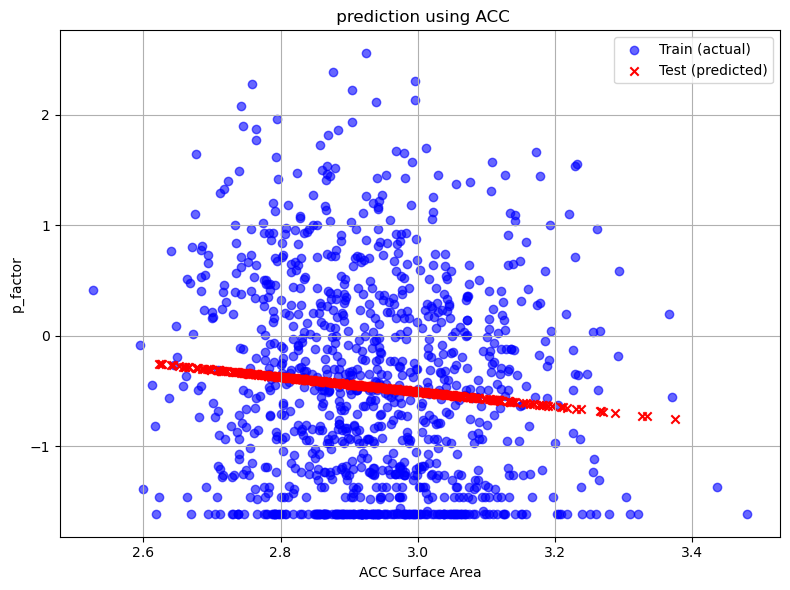

In [30]:
# Plot
import matplotlib.pyplot as plt
X_train = train_matrix[:, :1]
y_train = train_matrix[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Train (actual)', alpha=0.6)
plt.scatter(test_matrix, p_factor_predictions, color='red', label='Test (predicted)', marker='x')
plt.xlabel(f'ACC Surface Area')
plt.ylabel(f'p_factor')
plt.title(f' prediction using ACC')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()